In [1]:
import numpy as np
import pandas as pd

import prepare_skyler as p
import explore_skyler as e
import model_skyler as m
import warnings 
warnings.filterwarnings('ignore')

# Project Overview:
### Following the Data Science pipeline, build a machine learning model that accurately predicts wine quality rating.

# Goals:

* Acquire the data
* Prepare the data 
* Explore the data to find drivers of our target variable (quality rating)
* Use clustering to discover patterns 
* Use drivers to build models
* Validate, and then test our best model
* Deliver findings to a group of fellow data scientists

# Importing and Preparing Data

* data was originally 2 seperate sets acquired from data.world
* these sets were concatenated, column added for wine color, duplicates were removed
* the dataframe contained _ rows and _ columns before cleaning
* Split into train, validate, and test subsets with a 56/24/20 split

In [2]:
df = p.get_df()

### Original Data

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality  color  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
6      9.6        6  white  
9     11.0        6  white

In [4]:
train, validate, test = p.train_val_test_split(df)

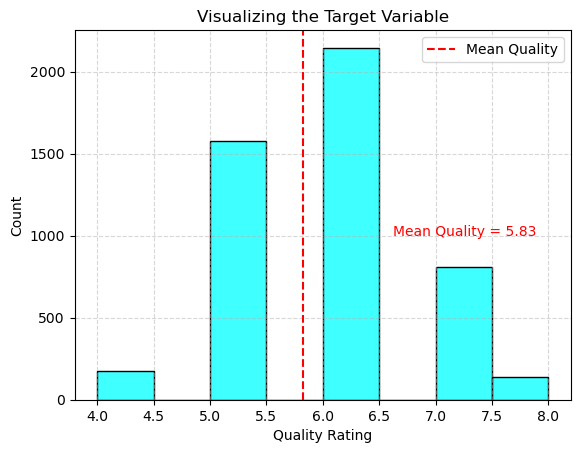

In [5]:
e.target_dist(df)

# Exploration

In [6]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality  color  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
6      9.6        6  white  
9     11.0        6  white

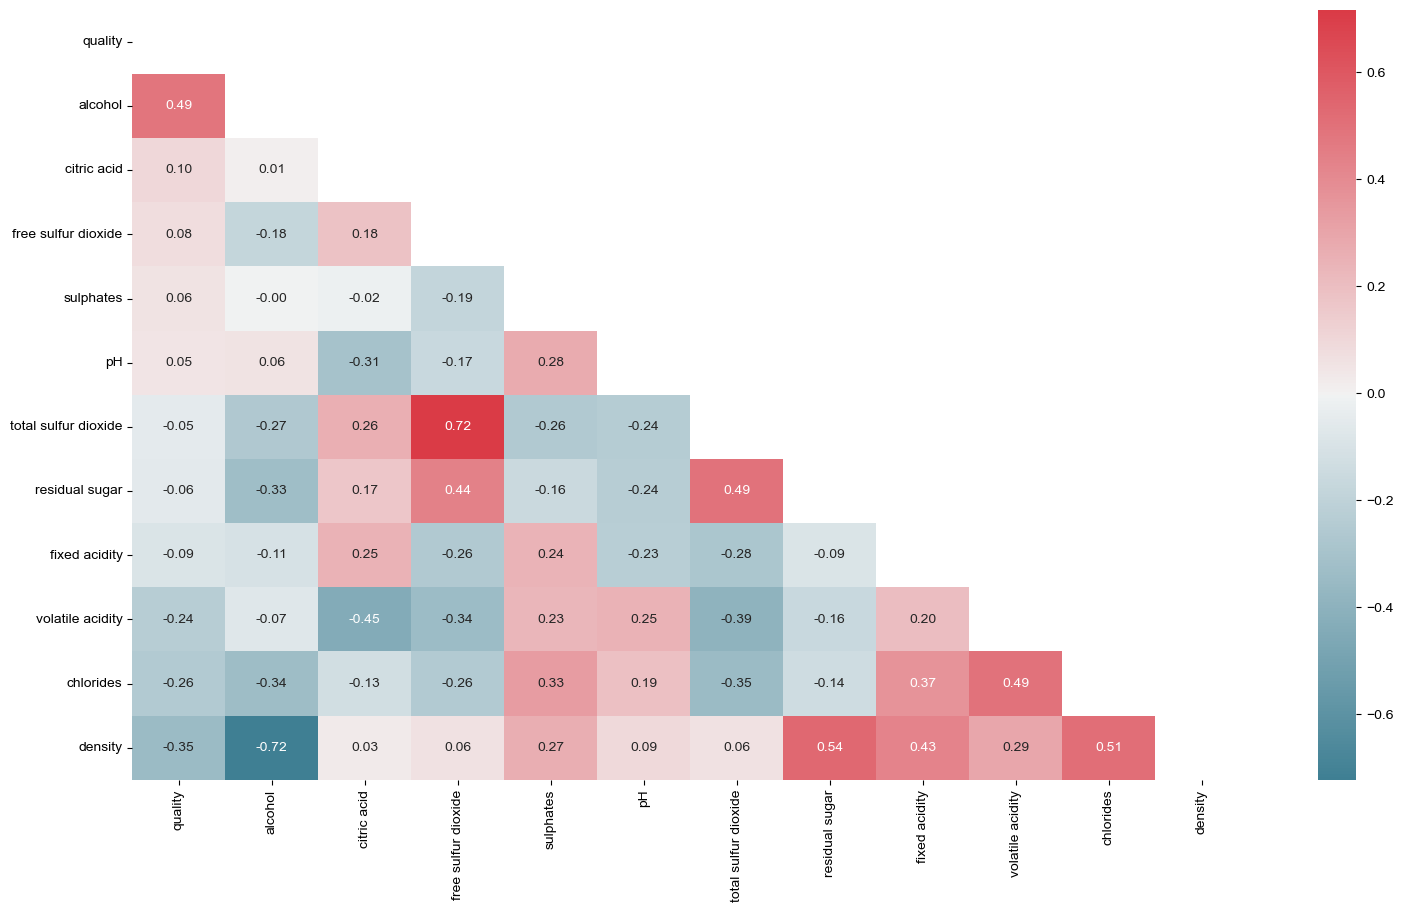

In [7]:
#call function to produce correlation coeficient heat map
e.corr_map(df)

### Exploration Question 1:

Is the mean alcohol content in high quality wine (7 and up) significantly higher than the alcohol content of wine with lower quality ratings (5 and below) ?

H0: There is not a significant difference in the average alcohol content between high quality wine (7-9) and wine with lower quality ratings (5 and below)

Ha: There is a significant difference in the average alcohol content between high quality wine (7-9) and wine with lower quality ratings (6 and below)

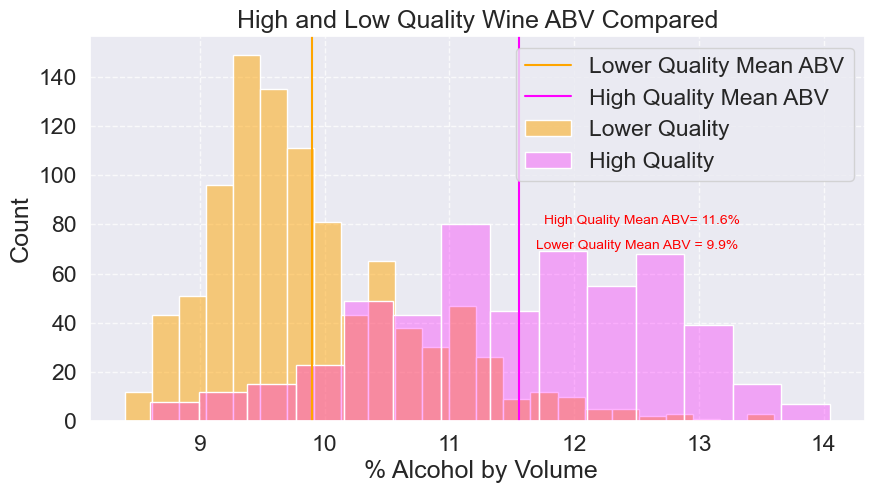

In [8]:
e.abv_plots(train)

### Independent t-test

In [9]:
e.abv_tstat(train)

t-statistic: 32.53
p-value: 0.0000


**Takeaways**
* The p value is lower than alpha (0.05)
* We can reject the null hypthesis, and state with confidence that there is a significant difference in the average alcohol content between high quality wine (7-9) and wine with lower quality ratings (6 and below)

### Exploration Question 2:
Does high quality wine (7+) have lower chloride levels than lower quality wine(5 and below)?

H0: There is no difference in the average chloride levels in wines of high quality and wines of lower quality

Ha: The average chloride levels in wines of high quality are significantly lower than wines of lower quality

In [10]:
train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4857            7.5              0.38         0.33             9.2      0.043   
5671            7.9              0.40         0.29             1.8      0.157   
3700            7.0              0.30         0.27             1.5      0.076   
6114            7.9              0.57         0.31             2.0      0.079   
1407            7.1              0.19         0.28             3.6      0.033   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4857                 19.0                 116.0  0.99444  3.08       0.42   
5671                  1.0                  44.0  0.99730  3.30       0.92   
3700                 24.0                 145.0  0.99344  3.10       0.52   
6114                 10.0                  79.0  0.99677  3.29       0.69   
1407                 16.0                  78.0  0.99300  2.91       0.78   

      alcohol  quality  color  
4857     11.4        6  white  
5671      9.5        6    red  
3700     10.1        5  white  
6114      9.5        6    red  
1407     11.4        6  white

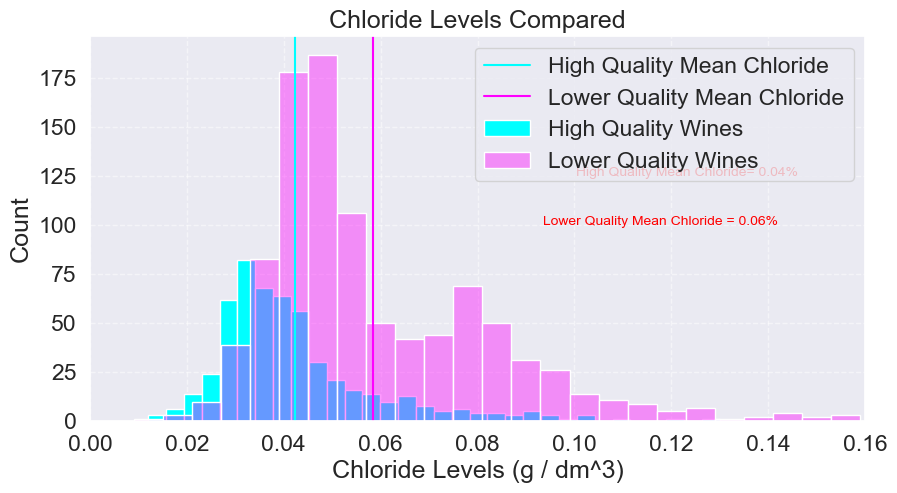

In [11]:
e.chlor_plots(train)

### Independent t-test

In [12]:
e.chlor_stat(train)

t-statistic: -14.26
p-value: 0.0000


**Takeaways**
* The p value is lower than alpha (0.05)
* We can reject the null hypothesis, and state with confidence that the average chloride levels in wines of high quality are significantly lower than wines of lower quality

### Exploration Question 3:

Does high quality wine (7+) have lower residual sugar levels than lower quality wine(5 and below)?
 
H0: There is no difference in the average residual sugar levels in wines of high quality and wines of lower quality

Ha: The average residual sugar levels in wines of higher quality wines are significantly lower than wines of lower quality

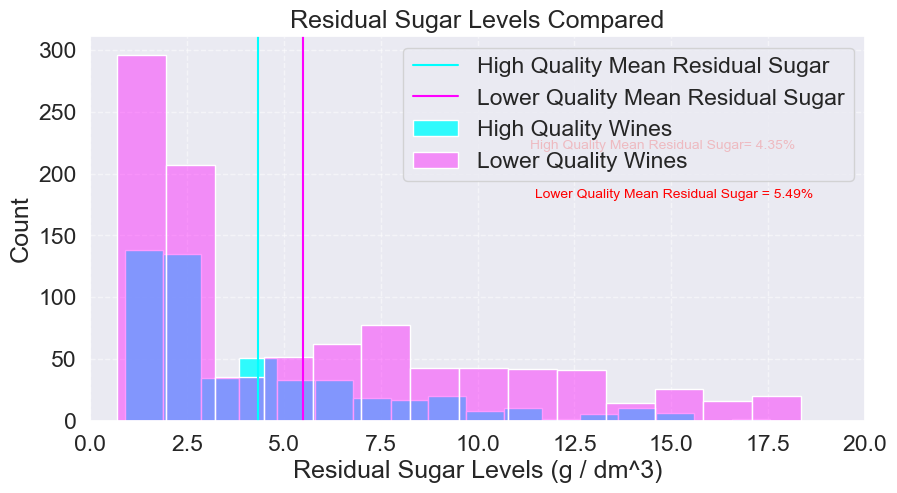

In [13]:
e.sugar_plots(train)

In [14]:
e.sugar_stat(train)

t-statistic: 4.94
p-value: 0.0000


**Takeaways**
* The p value is lower than alpha (0.05)
* We can reject the null hypothesis, and state with confidence that the average residual sugar levels in wines of higher quality wines are significantly lower than wines of lower quality

### Exploration Question 4:

Does high quality wine (7+) have lower Volatile Acidity levels than lower quality wine(5 and below)?

H0: There is no difference in the average Volatile Acidity levels in wines of high quality and wines of lower quality

Ha: The average Volatile Acidity levels in wines of higher quality wines are significantly lower than wines of lower quality

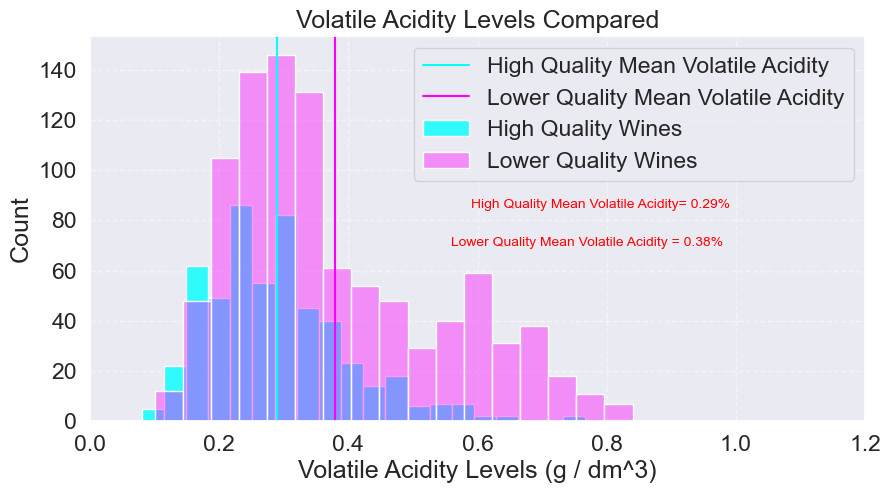

In [15]:
e.vol_acid_plots(train)

In [16]:
e.vol_stat(train)

t-statistic: 11.17
p-value: 0.0000


**Takeaways**
* The p value is lower than alpha
* We can reject the null hypothesis and state with confidence that the average Volatile Acidity levels in wines of higher quality wines are significantly lower than wines of lower quality

In [17]:
# call function to test all continous vairiables 
e.col_stat(train)

fixed acidity - t-statistic: 4.02
fixed acidity - p-value: 0.0001
volatile acidity - t-statistic: 11.17
volatile acidity - p-value: 0.0000
citric acid - t-statistic: -3.82
citric acid - p-value: 0.0001
residual sugar - t-statistic: 4.94
residual sugar - p-value: 0.0000
chlorides - t-statistic: 14.26
chlorides - p-value: 0.0000
free sulfur dioxide - t-statistic: -1.59
free sulfur dioxide - p-value: 0.1126
total sulfur dioxide - t-statistic: 4.21
total sulfur dioxide - p-value: 0.0000
density - t-statistic: 21.57
density - p-value: 0.0000
pH - t-statistic: -3.14
pH - p-value: 0.0017
sulphates - t-statistic: -3.12
sulphates - p-value: 0.0018
alcohol - t-statistic: -32.53
alcohol - p-value: 0.0000


### Exploration Takeaways:

* Each feature we explored is statistically a driver of our traget variable, quality rating.
* Tested ALL continuous variables with two sample t test, we failed to reject the null hypothesis on each feature besides free sulfur dioxide.
* High quality wine has less volitile acidity, residual sugar, chlorides, & more alcohol. 

# Clustering and Modeling
* Additional preperation was required for modeling:
    * Numeric features scaled using min/max scaler
    * Data was further split into X and y train,validate, test.
    * Target variable removed for modeling and clustering

In [18]:
# call funtion to test each feature with clustering, 
# and return list in order from best silhouette score 
m.find_best_features(df, 3, 3)

Top 6 features:
residual sugar: 0.696
alcohol: 0.597
citric acid: 0.584
total sulfur dioxide: 0.572
volatile acidity: 0.571
free sulfur dioxide: 0.567


## Clustering

* We will engineer a feature based on these clusters
* We will call a function to visualize the optimal number for k

In [19]:
# call function for visualization df
vis_df = m.get_vis_df(df)

In [20]:
m.get_3d_vis1(vis_df)

In [21]:
m.get_3d_vis2(vis_df)

In [22]:
m.get_3d_vis3(vis_df)

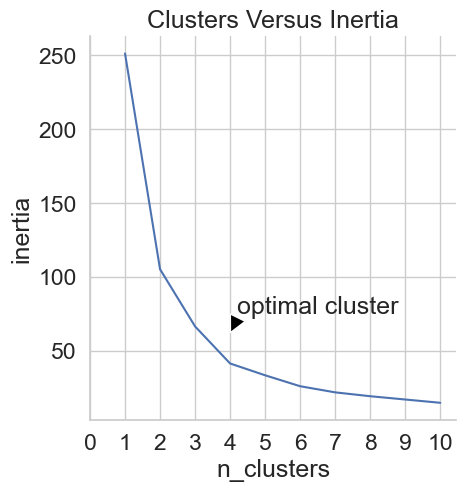

In [23]:
m.best_cluster(train, 'density', 'residual sugar')

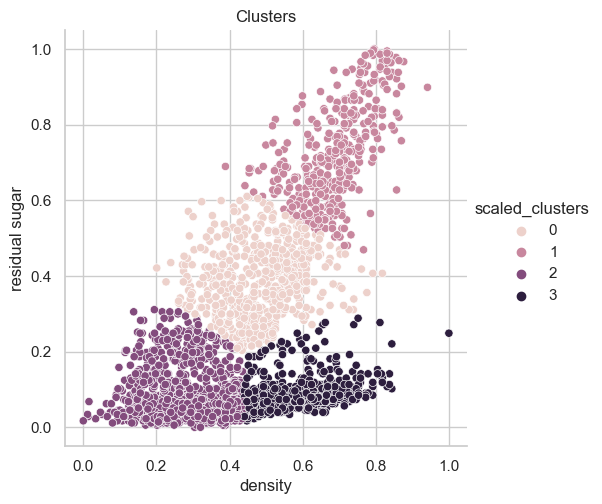

In [24]:
m.cluster_relplot(train, 'density', 'residual sugar')

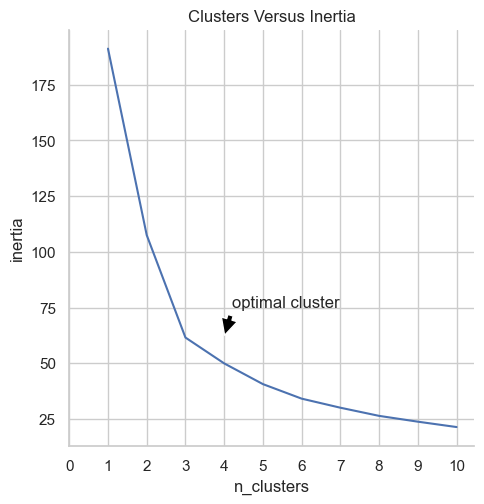

In [25]:
m.best_cluster(train, 'density', 'volatile acidity')

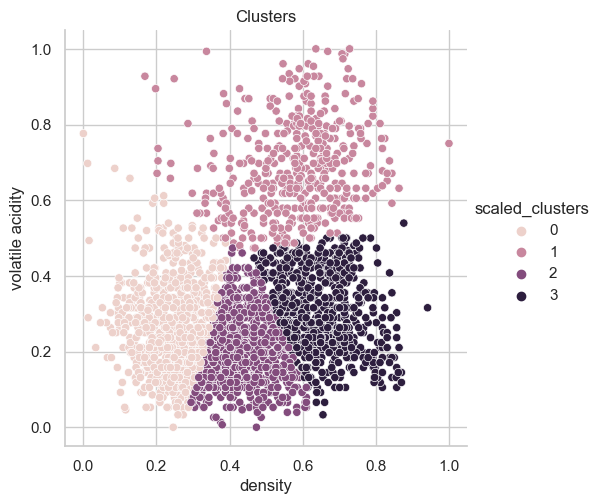

In [26]:
m.cluster_relplot(train, 'density', 'volatile acidity')

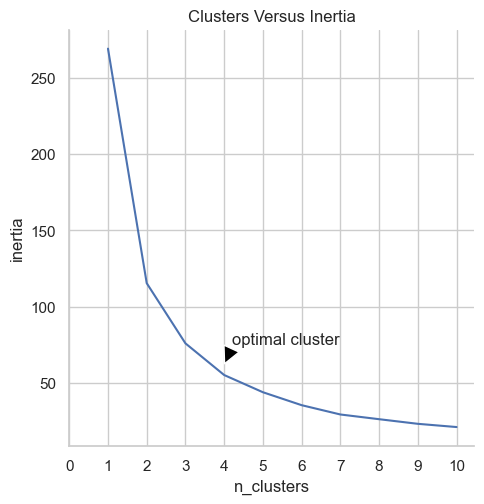

In [27]:
m.best_cluster(train, 'total sulfur dioxide', 'residual sugar')

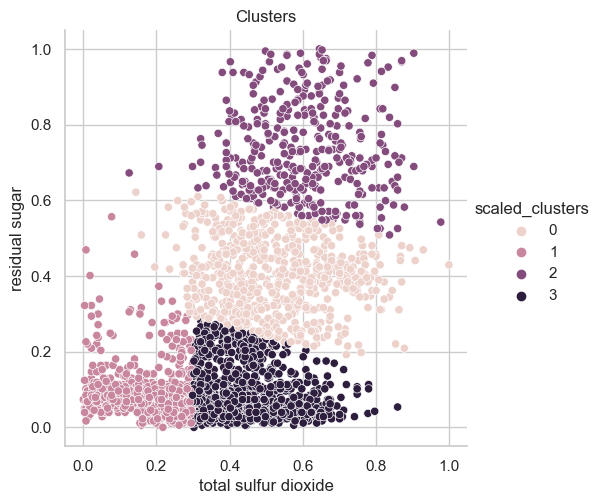

In [28]:
m.cluster_relplot(train, 'total sulfur dioxide', 'residual sugar')

### Modeling
* We will evaluate RMSE, our goal is to lower RMSE compared to basline
* We will test on 4 models; Linear Regression , Tweedie, Polynomial, lasso lars
* Data will be scaled using min/max scaler

In [29]:
# combining clusters and merging to original df
clusters = m.combined_df(df, 'density', 'residual sugar', 'volatile acidity', 'total sulfur dioxide')
# split new df in train, validate, test
train, validate, test = p.train_val_test_split(clusters)
# scale data
train_scaled, validate_scaled, test_scaled = m.scale_data(
    train, validate, test, return_scaler=False)

In [30]:
# take a peek at our data
train_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4857       0.462687          0.394737     0.445946        0.480226   0.225166   
5671       0.522388          0.421053     0.391892        0.062147   0.980132   
3700       0.388060          0.289474     0.364865        0.045198   0.443709   
6114       0.522388          0.644737     0.418919        0.073446   0.463576   
1407       0.402985          0.144737     0.378378        0.163842   0.158940   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
4857             0.219512              0.402214  0.469441  0.333333   
5671             0.000000              0.136531  0.655397  0.569892   
3700             0.280488              0.509225  0.404421  0.354839   
6114             0.109756              0.265683  0.620936  0.559140   
1407             0.182927              0.261993  0.375813  0.150538   

      sulphates   alcohol  quality  color  scaled_clusters_x  \
4857   0.246377  0.530973        6  white                  2   
5671   0.971014  0.194690        6    red                  3   
3700   0.391304  0.300885        5  white                  0   
6114   0.637681  0.194690        6    red                  3   
1407   0.768116  0.530973        6  white                  0   

      scaled_clusters_y  scaled_clusters  
4857                  2                2  
5671                  2                3  
3700                  1                0  
6114                  0                3  
1407                  1                3

In [31]:
# split our scaled data into X/y: train, validate, test
X_train, y_train, X_validate, y_validate, X_test, y_test = m.splitting_subsets(
    train, train_scaled, validate_scaled, test_scaled)

#### Calculating baseline RMSE

In [32]:
print(f' The Baseline RMSE is: {m.get_baseline(y_train)}')

 The Baseline RMSE is: 0.8508193687671466


In [33]:
# This function uses the train and validate datasets and 
# returns the results of 4 linear regression models as well as baseline.
m.best_models(X_train, y_train, X_validate, y_validate)

model  train_rmse  validate_rmse  difference
0  linear_poly    0.660149       0.687368   -0.027219
1   lasso_lars    0.850819       0.858614   -0.007794
2       linear    0.705700       0.709595   -0.003895
3      tweedie    0.783330       0.786728   -0.003399
4     baseline    0.850819       0.850819    0.000000

## Test

In [34]:
m.test_model(X_train, y_train, X_test, y_test)

 The RMSE score on test data is: 0.6842329852005568


## Conclusion
* PolynomialFeatures was the best performing model, reducing RMSE from the baseline of 0.85, to 0.68 on the validate set. 
* This resulted in a 20% reduction in root mean squared error on our validate set.

## Recommendations:

* Aquire additional features such as type of grape, yeast type, fermentation temp, etc.

## Next Steps:

* With more time, we would like to explore additional feature engineering.